# Introduction à la Science des données


## Travail pratique 04 - LVQ et Régression linéaire

[Table des matières](#toc)

**Informations de groupe - Prénoms et noms complets:**

- ...
- ...
- ...

**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing, Arthur Babey, Cédric Campos Carvalho

**Contact**: prenom.nom@heig-vd.ch ou de préférence via Teams 

### Modalités de rendu :

- **Date**: <span style="background-color:#eebbdd">19.01.2025, 23h55</span>


- **Travail par groupe** de 2 ou 3. 


- Une fois complété, rendez directement le notebook (fichier avec l'extension _.ipynb_) nommé correctement comme suit <span style="background-color:#eebbdd">"**TP4_ISD_SA2024_Nom1_Nom2(_Nom3).ipynb**"</span> en mettant les noms de famille de chaque membres du groupe (pour ceux avec plusieurs noms de famille, vous pouvez mettre juste le premier comme dans l'adresse email). Les TPs rendu avec un fichier mal nommé seront pénalisé !


- Mettez vos Prénoms et noms en entier ci-dessus. 


- Uploadez le fichier complété avant le délais sur Cyberlearn ou Teams selon les consignes données. 



### Déroulement et notation


<div class="alert alert-block alert-info">
    <b>Les questions</b> sont généralement indiquées en <b>gras</b>, en <span style="background-color:#AFEEEE">bleu</span> ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "<i>Réponse:</i>" pour les réponses textuelles. Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre. 
</div>


<div class="alert alert-block alert-info">
    <b>Notation: </b> Ce TP est noté sur 6 avec un total de  <span style="background-color:#eebbdd"><b>85</b></span> points. Les points sont indiqués pour chaques parties du travail pour un total de <span style="background-color:#eebbdd"><b>78</b></span> points  et <span style="background-color:#eebbdd"><b>7</b></span> points supplémentaires sont attribués au rendu du travail (format et nommage selon les consignes) et à la propreté (lisibilité et mise en page, tournure de phrase des réponses). 
</div>


<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn/Teams ou un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points obtenus. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>

---


<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Comprendre la modélisation avec un modèle simple: le modèle à base de règles
- Analyse des résultats avec la matrice de confusion
- Évaluation des performances avec Validation hold-out et N-Fold Crossvalidation. 

<div class="alert alert-block alert-info">
<b>Aide </b>
</div>

N'oubliez pas que vous pouvez retourner vers les TPs précédents si vous avez des questions sur Python, Numpy, Pandas ou Matplotlib. Gardez vos cheatsheets à proximité !

- [Data wrangling with Pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib cheatscheets](https://matplotlib.org/cheatsheets/)

<div class="alert alert-block alert-info">
<b>N'hésitez pas à écrire à vos assistants directement sur Teams en cas de question.  </b>
</div>



---

### Table des matières<a name="toc"></a>


[Partie 1: LVQ: learning vector quantization ](#Part1)    ----    [28 points](#Part1pts)

[- 1.1 Implémentation et interprétation](#Part11)

[- 1.2 Questions](#Part12)


---

[Partie 2: Régression linéaire ](#Part2)    

[- 2.1 California Housing Dataset](#Part21)     ----    [10 points](#Part21pts)

[- 2.2 Corrélation, R-carré, variance et covariance](#Part22)     ----    [11 points](#Part22pts)

[- 2.3 Régression linéaire simple](#Part23)     ----    [12 points](#Part23pts)

[- 2.4 Régression linéaire multiple](#Part24)     ----    [10 points](#Part24pts)

[- 2.5 Conclusion](#Part25)     ----    [2 points](#Part25pts)


---


[Partie 3: Clustering avec K-means](#Part3)        ----    [5 points](#Part3pts)

---

<p style="background-color:#7ba3e3;padding:10px"><font size="6"><b></b></font></p>

---


In [13]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import math
from math import sqrt
from random import randrange, seed, shuffle
import itertools


# Différents moyens de standardiser les données mis à disposition par Scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, ConfusionMatrixDisplay

from collections import Counter, defaultdict



## Partie 1: LVQ: learning vector quantization<a name="Part1"></a>

[Table des matières](#toc)

[- 1.1 Implémentation et interprétation](#Part11)

[- 1.2 Questions](#Part12)




Pour commencer ce TP nous allons reprendre où nous étions au TP précédent et utiliser l’algorithme LVQ pour traiter le problème de classification des vins. Vous allez testez LVQ en explorant différentes valeurs d'hyper-paramètres (c.a.d., nombre de prototypes, learning rate et nombre d’epochs). 



<a name="Part11"></a>
### 1.1 Implémentation et interprétation
[Début partie 1](#Part1) --- [Table des matières](#toc)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Complétez les commentaires</p>(7 points)

Pour commencer complétez les docstrings des fonctions de l'implémentation de LVQ ci-dessous. Ce code provient du cours et a simplement été adapté pour le dataset wines avec la cross validation. 

In [15]:
def euclidean_distance(row1: list, row2: list):
    '''
    Calcule la distance euclidienne entre deux vecteurs de caractéristiques.
    
    Args:
        row1 (list): Premier vecteur de caractéristiques.
        row2 (list): Deuxième vecteur de caractéristiques.
    
    Returns:
        float: La distance euclidienne entre les deux vecteurs.
    '''
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)


def get_best_matching_unit(codebook: list, test_row: list):
    '''
    Trouve le vecteur de code le plus proche (BMU) dans le codebook pour une ligne de test donnée.
    
    Args:
        codebook (list): Liste des vecteurs de code.
        test_row (list): Vecteur de caractéristiques de la ligne de test.
    
    Returns:
        list: Le vecteur de code le plus proche.
    '''
    distances = list()
    for codevector in codebook:
        dist = euclidean_distance(codevector, test_row)
        distances.append((codevector, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]


def predict(codebooks: list, test_row: list):
    '''
    Prédit la classe pour une ligne de test donnée en utilisant les vecteurs de code.
    
    Args:
        codebooks (list): Liste des vecteurs de code.
        test_row (list): Vecteur de caractéristiques de la ligne de test.
    
    Returns:
        int: La classe prédite pour la ligne de test.
    '''
    bmu = get_best_matching_unit(codebooks, test_row)
    return bmu[-1]


def predict_lvq(train, test, n_codebooks, lrate, epochs):
    '''
    Prédit les classes pour un ensemble de test en utilisant l'algorithme LVQ.
    
    Args:
        train (list): Ensemble d'entraînement.
        test (list): Ensemble de test.
        n_codebooks (int): Nombre de vecteurs de code.
        lrate (float): Taux d'apprentissage.
        epochs (int): Nombre d'époques d'entraînement.
    
    Returns:
        list: Liste des classes prédites pour l'ensemble de test.
    '''
    codebooks = train_codebook(train, n_codebooks, lrate, epochs)
    return [predict(codebooks, row) for row in test]


def init_codevector(train, category):
    '''
    Initialise un vecteur de code pour une catégorie donnée en sélectionnant une observation aléatoire de cette catégorie.
    
    Args:
        train (list): Ensemble d'entraînement.
        category (int): Catégorie pour laquelle initialiser le vecteur de code.
    
    Returns:
        list: Vecteur de code initialisé.
    '''
    n_records = len(train)
    n_features = len(train[0])-1
    found = False
    while(not found):
        random_observation = randrange(n_records)
        if (train[random_observation][-1] == category):
            found = True
            
    codevector = [train[random_observation][i] for i in range(n_features)]
    codevector.append(category)
    return codevector


def random_codebook(train):
    '''
    Génère un vecteur de code aléatoire à partir de l'ensemble d'entraînement.
    
    Args:
        train (list): Ensemble d'entraînement.
    
    Returns:
        list: Vecteur de code aléatoire.
    '''
    n_records = len(train)
    n_features = len(train[0])
    codebook = [train[randrange(n_records)][i] for i in range(n_features)]
    return codebook


def train_codebook(train, n_codevectors, lrate, epochs):
    '''
    Entraîne les vecteurs de code en utilisant l'algorithme LVQ.
    
    Args:
        train (list): Ensemble d'entraînement.
        n_codevectors (int): Nombre de vecteurs de code.
        lrate (float): Taux d'apprentissage.
        epochs (int): Nombre d'époques d'entraînement.
    
    Returns:
        list: Liste des vecteurs de code entraînés.
    '''
    codebook = [random_codebook(train) for i in range(n_codevectors)]
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        shuffle(train)
        for row in train:
            bmu = get_best_matching_unit(codebook, row)
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                sum_error += error**2
                if bmu[-1] == row[-1]:
                    bmu[i] += rate * error
                else:
                    bmu[i] -= rate * error
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    return codebook


Fonctions reprises de kNN du TP précédent:

In [17]:
def accuracy_metric(actual: list[float], predicted: list[float]):
    """
    Calcule l'accuracy en comparant les valeurs réelles et prédites.

    Args:
        actual (list[float]): Liste des valeurs réelles.
        predicted (list[float]): Liste des valeurs prédites.

    Returns:
        float: Le pourcentage d'accuracy.
    """
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


def cross_validation_split(dataset, n_folds):
    """
    Divise le dataset en n_folds parties pour la validation croisée.

    Args:
        dataset (list): Le dataset à diviser.
        n_folds (int): Le nombre de folds à créer.

    Returns:
        list: Une liste de n_folds sous-ensembles du dataset.
    """
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Testez différents hyper paramètres.</p>(3 points)

Trouvez des paramètres permettant d'arriver à une accuracy de plus de 96%. 

Notes: 
- L'accuracy et la matrice de confusion sont affiché en fin de sortie
- pour éviter un affichage trop long, vous pouvez soit: réduire la cellule de sortie en cliquant à gauche de la cellule, soit décommenter le *print()* de la fonction *train_codebook()*.  

Nouvel ordre des colonnes: ['Alcool', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline', 'Note']
>epoch=0, lrate=0.010, error=1801.705
>epoch=1, lrate=0.010, error=1763.211
>epoch=2, lrate=0.010, error=1688.532
>epoch=3, lrate=0.010, error=1691.844
>epoch=4, lrate=0.010, error=1734.400
>epoch=5, lrate=0.010, error=1795.988
>epoch=6, lrate=0.010, error=1801.295
>epoch=7, lrate=0.010, error=1663.086
>epoch=8, lrate=0.010, error=1355.669
>epoch=9, lrate=0.010, error=1160.872
>epoch=10, lrate=0.009, error=1070.566
>epoch=11, lrate=0.009, error=1020.339
>epoch=12, lrate=0.009, error=995.527
>epoch=13, lrate=0.009, error=982.570
>epoch=14, lrate=0.009, error=979.690
>epoch=15, lrate=0.009, error=974.823
>epoch=16, lrate=0.009, error=972.018
>epoch=17, lrate=0.009, error=970.543
>epoch=18, lrate=0.009, error=969.346
>epoch=19, lrate=0.009, error=96

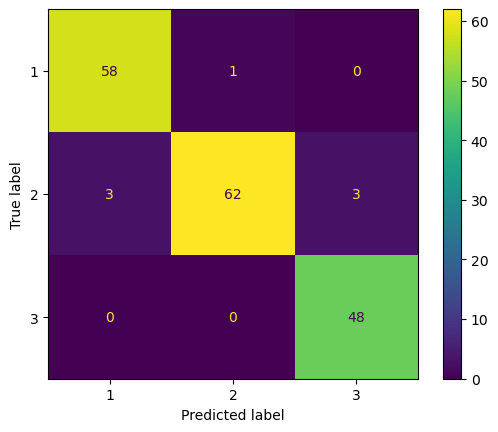

In [32]:
headers = ['Note', 'Alcool', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
           'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wines = pd.read_csv('./wine.data', names=headers)

# Le code ci-dessus attend la variable dépendante (Note) à la fin et non au début
# Quelques modifications s'imposent. 

# On garde le même scaler
scaler = StandardScaler()

# Créer une copie et prendre une liste des colonnes des données indépendantes (entrées)
df_normalized_end = wines.copy()
cols = wines.columns[wines.columns != 'Note']

# Remplacer les colonnes des données par les données transformées
df_normalized_end[cols] = scaler.fit_transform(df_normalized_end[cols])

# On prend la liste des colonnes et on met le premier élément à la fin
all_cols = df_normalized_end.columns.tolist()

all_cols = all_cols[1:] + [all_cols[0]]
print(f"Nouvel ordre des colonnes: {all_cols}")

df_normalized_end = df_normalized_end[all_cols]

# conversion en liste de listes 
data_normalized_end = df_normalized_end.values.tolist()

seed(0)    # Fix pseudo aléatoire

# Hyper paramètres de LVQ à optimiser. 

lr = 0.01
n_epochs = 200
n_codevectors = 10

# -------------------------------

folds = cross_validation_split(data_normalized_end, n_folds=5)

predictions = []
actuals = []
results = defaultdict(list)
    
for test_i in range(len(folds)):
    
    train = list(itertools.chain.from_iterable(folds[:test_i] + folds[test_i+1:]))
    test = folds[test_i]
    
    predictions += predict_lvq(train, test, n_codevectors, lr, n_epochs)
    actuals += [i[-1] for i in test]
    print(f'Prediction of fold {test_i}: {accuracy_metric(actuals, predictions)}')


# Accuracy
results = accuracy_metric(actuals, predictions)
print(f'Performance of LVQ with ({lr=}, {n_epochs=}, {n_codevectors=}): {results}')

# Matrice de confusion
cm = confusion_matrix(actuals, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels = ["1", "2", "3"])
disp.plot()
plt.show()


<a name="Part12"></a>
### 1.2 Questions
[Début partie 1](#Part1) --- [Table des matières](#toc)


**Répondez aux questions suivantes** (16 points) 



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Comparez les prédictions de LVQ obtenues ici et les prédictions que vous avez obtenu avec kNN au TP précédent. </p> (2 points)

*Réponse:*
Avec le KNN la précision était de 90% et avec LVQ 96% donc LVQ est plus prcis que KNN.


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Donnez les différences entre kNN et LVQ au niveau de la nature de l'algorithme, de la phase d'apprentissage, de la représentation des classes, de la sensibilité au bruit et de la complexité. Faites une liste à puce. </p> (10 points)

*Réponse:*
 
- Nature de l'algorithme :

  kNN : Algorithme paresseux (lazy learning), il ne construit pas de modèle explicite pendant la phase d'entraînement.

  LVQ : Algorithme actif (eager learning), il construit un modèle explicite en ajustant les vecteurs de code pendant  la phase d'entraînement.

- Phase d'apprentissage :

    kNN : Pas de phase d'apprentissage explicite. L'algorithme stocke simplement les données d'entraînement et effectue les calculs lors de la prédiction.

    LVQ : Phase d'apprentissage explicite où les vecteurs de code sont ajustés pour mieux représenter les classes.

- Représentation des classes :

    kNN : Les classes sont représentées par les instances d'entraînement elles-mêmes.

    LVQ : Les classes sont représentées par des vecteurs de code (prototypes) qui sont ajustés pendant l'entraînement.

- Sensibilité au bruit :

    kNN : Sensible au bruit car chaque instance d'entraînement peut influencer les prédictions.

    LVQ : Moins sensible au bruit car les vecteurs de code sont ajustés pour minimiser l'impact des instances bruyantes.

- Complexité :

    kNN : Complexité de prédiction élevée (O(n)) car il doit calculer la distance entre l'instance de test et toutes les instances d'entraînement.

    LVQ : Complexité de prédiction plus faible (O(m), où m est le nombre de vecteurs de code) car il ne compare qu'avec les vecteurs de code.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Qu'est-ce que l'aléatoire et le pseudo-aléatoire ? </p> (2 points)

*Réponse:* l'aléatoire est vraiment imprévisible, tandis que le pseudo-aléatoire est déterminé par des formules mathématiques et peut être recréé.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Que se passe-t-il si vous ne fixer par le seed, et quel risque cela représente ? Quelles fonctions, dans l'implémentation de LVQ de ce TP, utilisent du pseudo-aléatoire ?</p> (2 points)

*Réponse:* 
Si on ne fixe pas le seed, les résultats de notre algorithme peuvent varier à chaque exécution, rendant difficile la reproduction des résultats et la comparaison des modèles.

Fonctions utilisant du pseudo-aléatoire dans l'implémentation de LVQ :

init_codevector(train, category): Sélectionne une observation aléatoire pour initialiser un vecteur de code.

random_codebook(train): Génère un vecteur de code aléatoire à partir de l'ensemble d'entraînement.

train_codebook(train, n_codevectors, lrate, epochs): Mélange les données d'entraînement à chaque époque.

<a name="Part1pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 1: </b> Points obtenus: /28
</div>

Remarques de l'assistant: 

- Docstrings: /7
- Hyper-paramètres: /3
- Questions: /16

[Début partie 1](#Part1) --- [Table des matières](#toc)


<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

---

<p style="background-color:#7ba3e3;padding:10px"><font size="6"><b></b></font></p>

---

## Partie 2 - Régression linéaire<a name="Part2"></a>

[Table des matières](#toc)

[- 2.1 California Housing Dataset](#Part21)     ----    [10 points](#Part21pts)

[- 2.2 Corrélation, R-carré, variance et covariance](#Part22)     ----    [11 points](#Part22pts)

[- 2.3 Régression linéaire simple](#Part23)     ----    [12 points](#Part23pts)

[- 2.4 Régression linéaire multiple](#Part24)     ----    [10 points](#Part24pts)

[- 2.5 Conclusion](#Part25)     ----    [2 points](#Part25pts)

Comme vous avez pu en voir au cours des précédents travaux pratiques, une certaine quantité de datasets publics sont régulièrement utilisés comme base d'apprentissage pour la science des données. Dans ce TP nous utiliserons le dataset connu sous le nom de "California Housing Dataset" qu'il est possible d'obtenir [ici via scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) et qui contient des données concernant le prix des maisons en Californie. Scikit-learn fournit une rapide analyse exploratoire qui a été copiée en partie ci-dessous. 



<a name="Part21"></a>
### 2.1 California Housing Dataset

[Début partie 2](#Part2) --- [Table des matières](#toc)



**Regardez l'analyse exploratoire des données présentée ci-dessous et répondez aux [questions](#Q21).**

Vous n'avez normalement pas besoin de modifier le code mais vous êtes libres d'en ajouter ou de le modifier. 



In [5]:
# On importe la fonction fetch_california_housing

from sklearn.datasets import fetch_california_housing

# Et on l'utilise. 
# l'option "as_frame" permet d'obtenir directement un DataFrame dans le dictionnaire.
# Sans cela, l'élément "frame" serait absent du dictionnaire ci-dessous.
# Les différents éléments du dictionnaire (Data, Target, DESCR, noms de colonnes, etc) 
# sont dès lors directement accessible

california_housing = fetch_california_housing(as_frame=True) 

# Étant donné qu'il s'agit d'un dictionnaire, on peut regarder les clés et leur contenu (affiché ci-dessus)
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Notre variable "california_housing" contient donc:

- **Data:** tableau des données principales sans la variable dépendante <class 'pandas.core.frame.DataFrame'>
- **Target:** données de la variable dépendante <class 'pandas.core.series.Series'>
- **Frame:** le dataframe obtenu grâce à l'option "as_frame = True" <class 'pandas.core.frame.DataFrame'>
- **feature_names:** nom(s) de colonne pour variable(s) indépendante(s) <class 'list'>
- **target_names:** nom(s) de colonne pour variable(s) dépendante(s) <class 'list'>
- **DESCR:** description du dataset <class 'str'>


En utilisant print(), on peut afficher de manière plus lisible l'élément "DESCR" du dictionnaire. (car print() va interpréter les caractères spéciaux comme '\n' -> retour à la ligne)

**Lisez attentivement le contenu de DESCR ci-dessous:**

In [6]:
print(california_housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

---
En accédant à l'élément frame, on peut commencer à travailler comme d'habitude et analyser nos données

In [7]:
# Données brutes
df_raw = california_housing.frame

df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


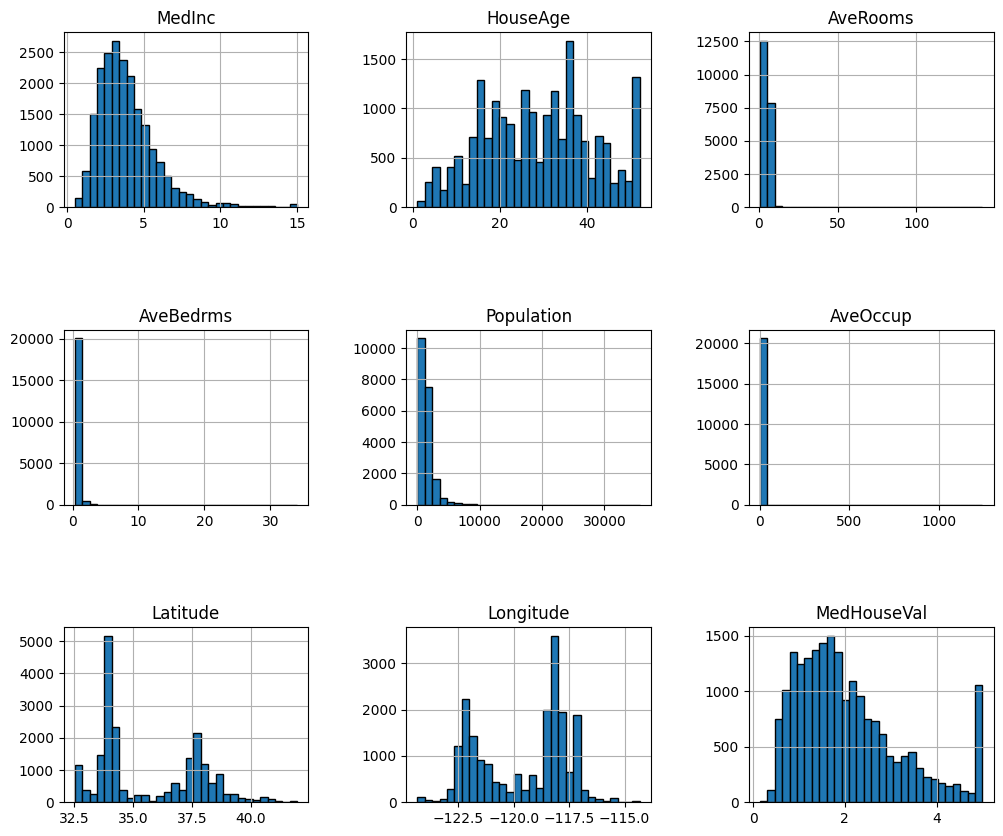

In [8]:
# Histogrammes des variables
df_raw.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

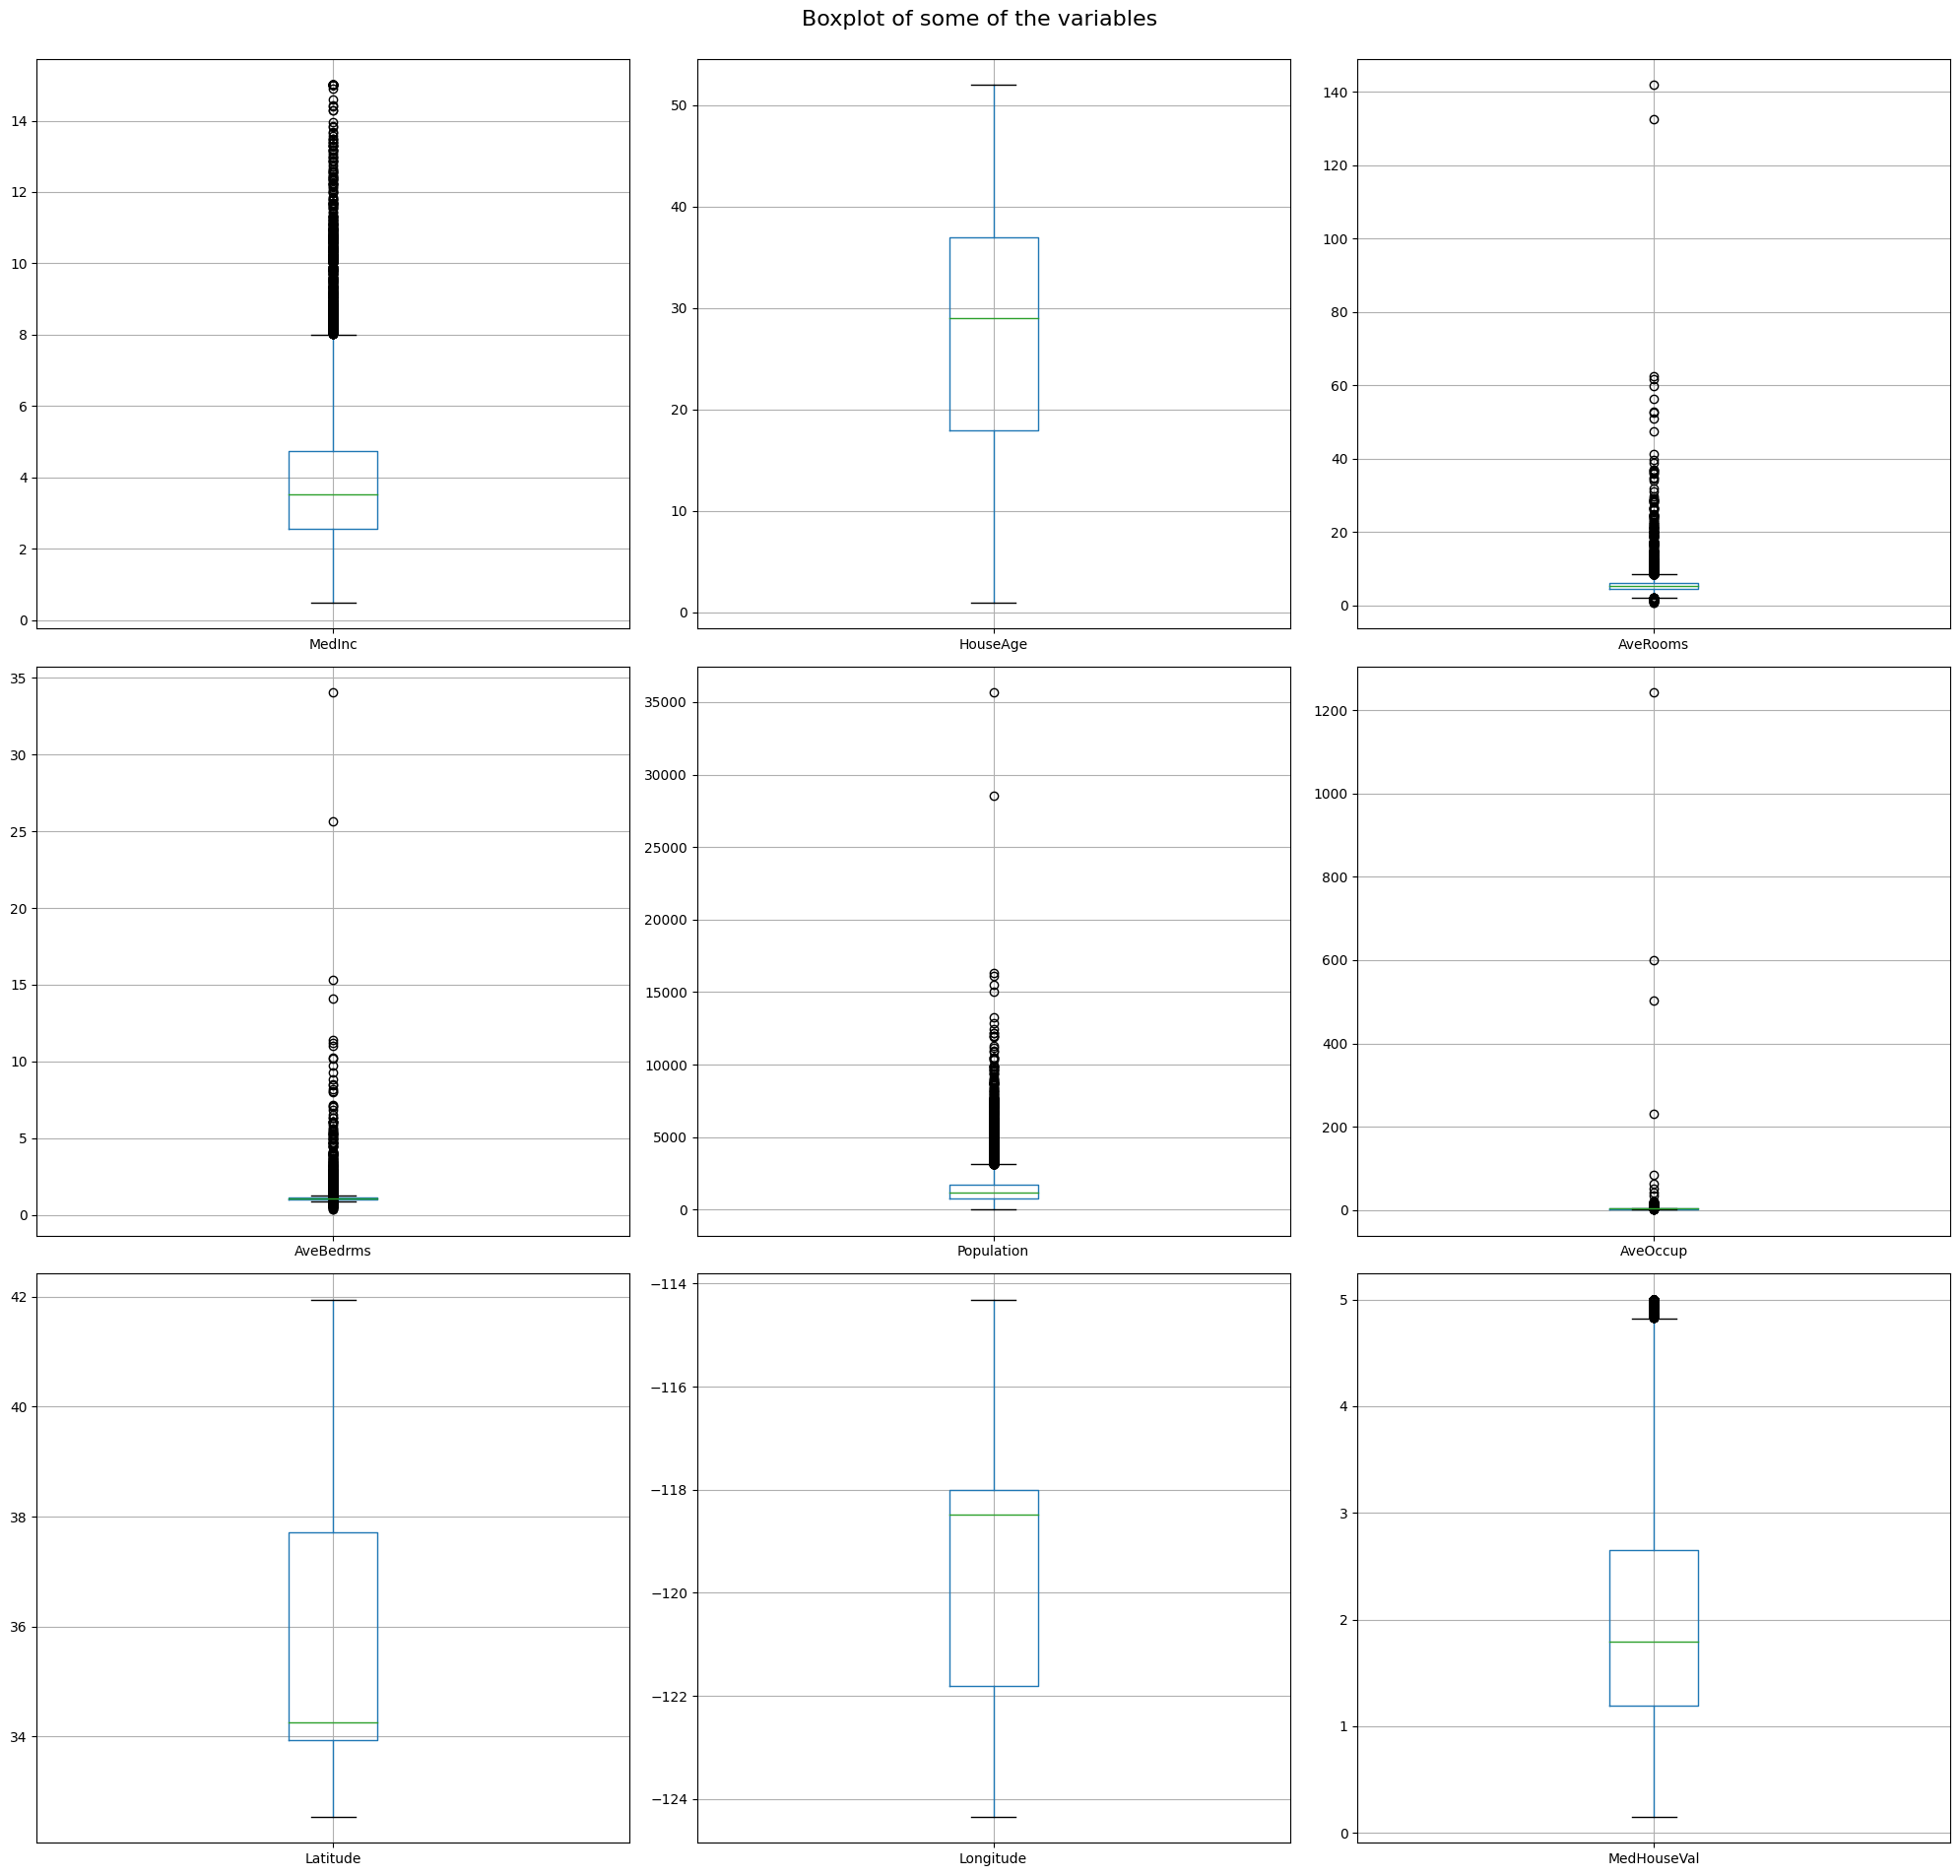

In [9]:
# Boxplot des variables

variables = df_raw.columns

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(variables):
    df_raw.boxplot(col, ax=axs[i])
    
fig.suptitle('Boxplot of some of the variables', fontsize=16)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

Certaines variables présentent des valeurs extrêmes. Observons les en détails:  

In [10]:
features_of_interest = ["AveRooms", "AveOccup", "Population"] 
california_housing.frame[features_of_interest].describe()

,AveRooms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000
mean,5.429000,3.070655,1425.476744
std,2.474173,10.386050,1132.462122
min,0.846154,0.692308,3.000000
25%,4.440716,2.429741,787.000000
50%,5.229129,2.818116,1166.000000
75%,6.052381,3.282261,1725.000000
max,141.909091,1243.333333,35682.000000


Pour avoir un meilleur aperçu des données, nous allons supprimer quelques observations extrêmes. Pour prédire le prix d'une maison à partir de données régionales, nous pouvons exclure les éléments sortants de l'ordinaire. Si vous le souhaitez, vous pouvez réafficher différents graphiques pour voir vos nouvelles données.

In [11]:
# Création d'un nouveau DataFrame "df" sans les valeurs abérrantes
df = df_raw[(df_raw["AveRooms"] < 10) & (df_raw["Population"] < 20000)]

<a name="plotA"></a>

**Ho non !** Le code ci-dessous affiche un magnifique graphique, mais on ne comprend rien au code ! Complétez les 10 commentaires indiqués par "# -". 

Complémentez vos commentaires directement dans le code ci-dessous. Il n'y a rien besoin de reporter dans la [première question](#Q21).

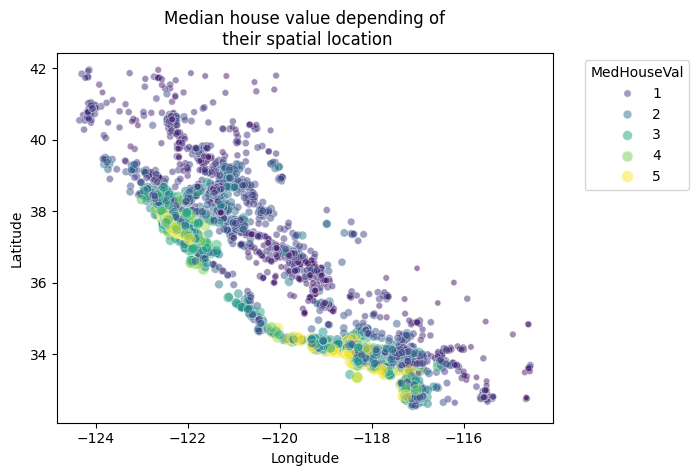

In [12]:
# -
rng = np.random.RandomState(0)

# -
indices = rng.choice(np.arange(df.shape[0]), 
                     size=10000,
                     replace=False)

# -
sns.scatterplot(
    data=df.iloc[indices],                         # -
    x="Longitude", y="Latitude",                   # -
    size="MedHouseVal",                            # -
    hue="MedHouseVal",                             # -
    palette="viridis",                             # -
    alpha=0.5)                                     # -

# -
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

<a name="plotB"></a>
On créé maintenant un joli pairplot avec Seaborn

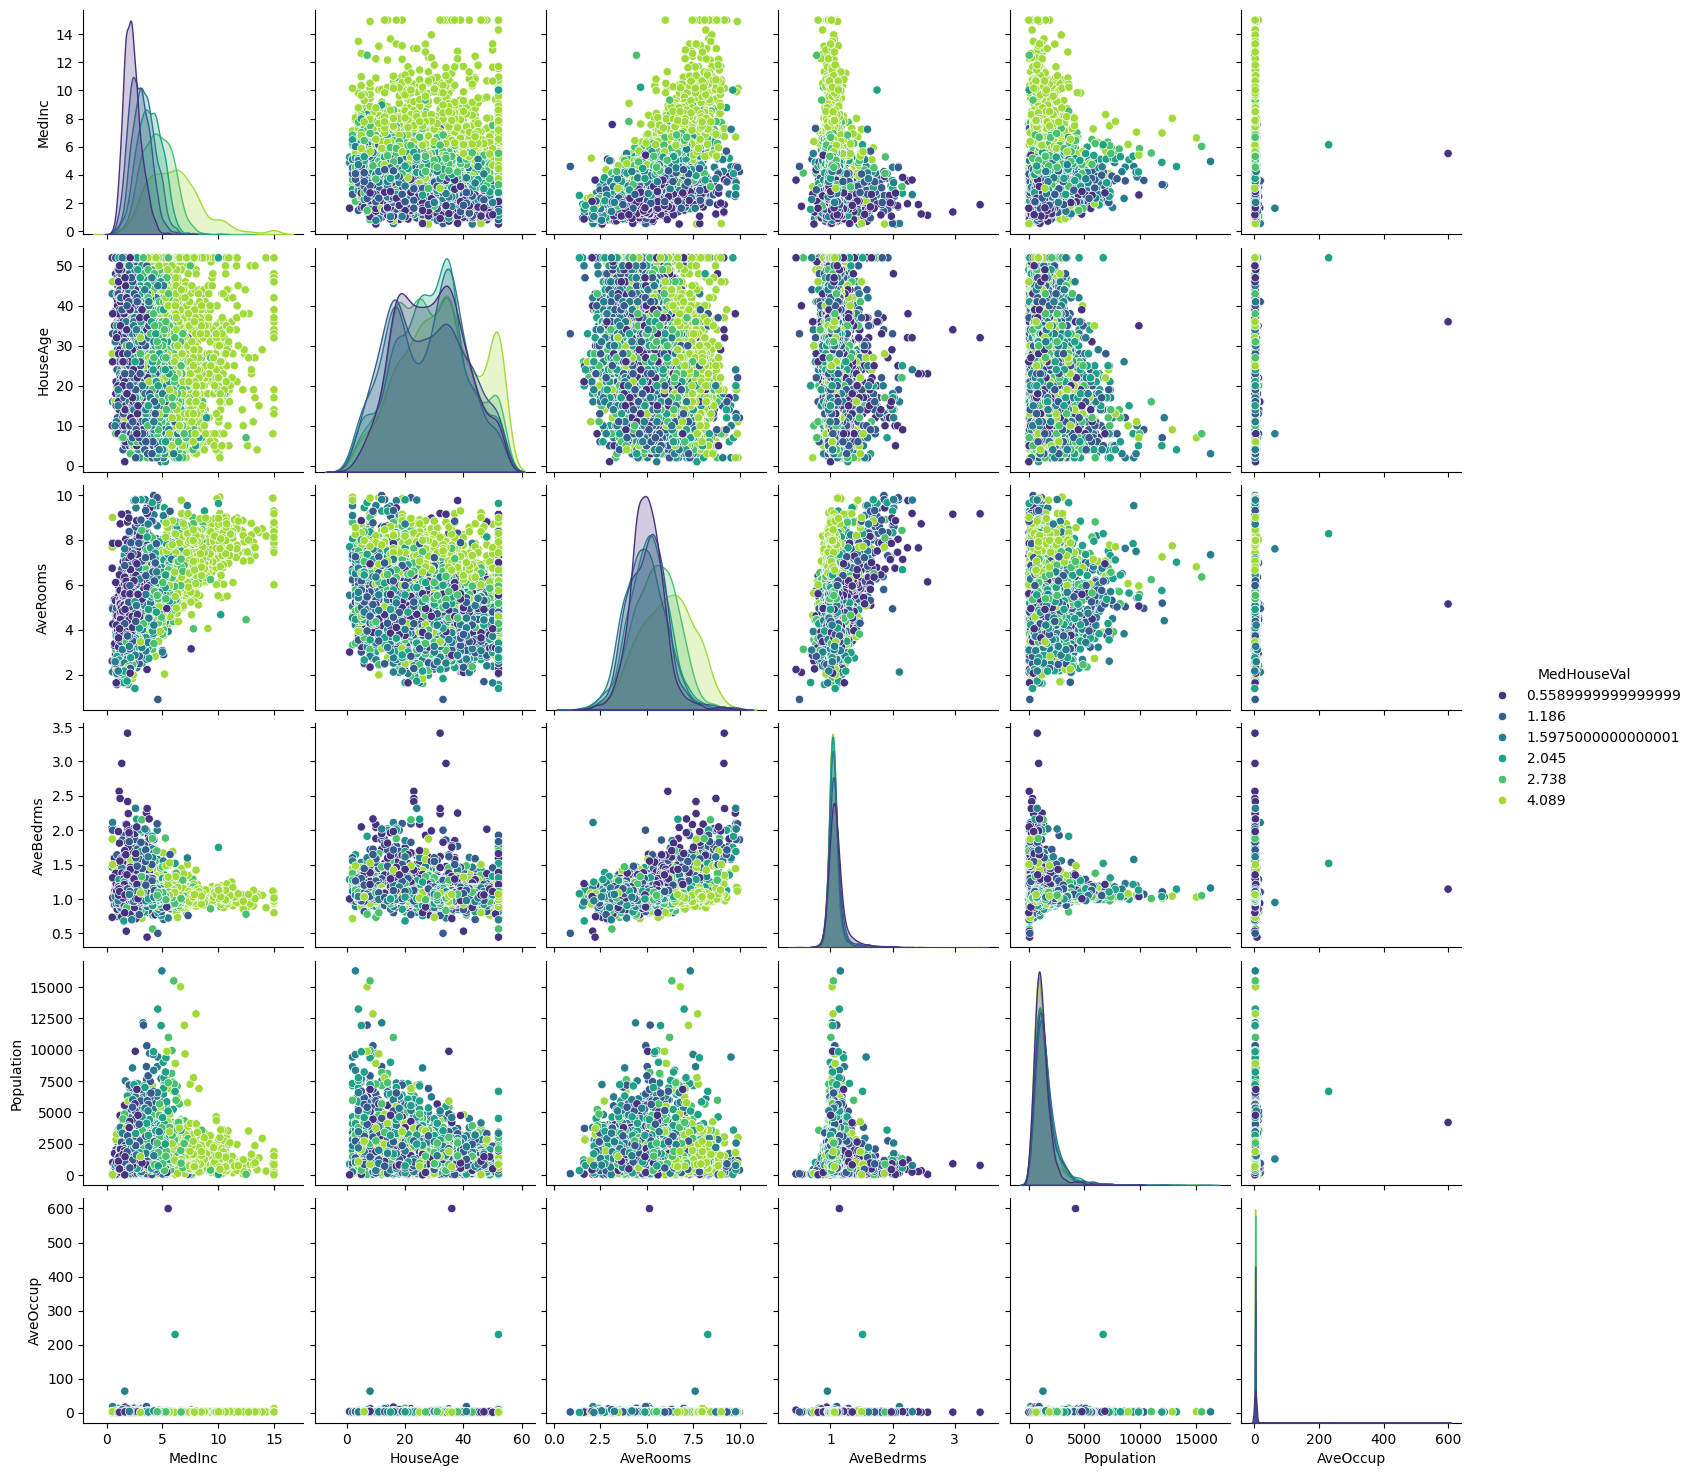

In [13]:
# Inutile de garder ces deux colonnes
columns_drop = ["Longitude", "Latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)

# Ignorez ce petit passage un peu complexe, c'est pour avoir 6 couleurs pour une variable continue. 
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

- 

<a name="Q21"></a>

#### Questions



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Complétez les commentaires du graphique de la représentation spatiale des points ci-dessus.</p> (5 points)

**Indiquez vos réponses directement dans le code du [graphique](#plotA)**.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Donnez une description de ce qui peut être observé sur le pairplot. Est-ce un bon graphique ? Quelle amélioration(s) pourrai(en)t être apportée(s) ou quel autre graphique pourrait être ajouté ?</p>(3 points)

*Réponse:*



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelle(s) variable(s) se démarquent des autres en tant que potentiel(s) prédicteur(s) et à quoi le voit-on sur le pairplot ? </p>(2 points)

*Réponse:*

<a name="Part21pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.1: </b> Points obtenus: /10
</div>

Remarques de l'assistant: 

- 


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

<a name="Part22"></a>
### 2.2 Corrélation, R-carré, variance et covariance
[Début partie 2](#Part2) --- [Table des matières](#toc)




Dans cette partie, nous allons rapidement revoir des concepts qui sont très souvent mélangés. Pour une explication limpide, dans un anglais très compréhensible et sous-titré, vous pouvez regarder les vidéos suivantes (attention, contient de l'humour et de la guitare). Ces vidéos paraissent longues mais vont à un rythme relativement lent, n'hésitez pas à simplement revoir les passages qui vous sont utiles: 


- [Correlation Clearly Explained !!!(20 minutes)](https://www.youtube.com/watch?v=xZ_z8KWkhXE)
- [Calculating the Mean, Variance and Standard Deviation, Clearly Explained!!!](https://www.youtube.com/watch?v=SzZ6GpcfoQY)
- [Covariance, Clearly Explained !!!(20 minutes)](https://www.youtube.com/watch?v=qtaqvPAeEJY)
- [R-Squared, Clearly Explained !!!(11 minutes)](https://www.youtube.com/watch?v=bMccdk8EdGo)
- [Linear Regression, Clearly Explained !!!(30 minutes)](https://www.youtube.com/watch?v=nk2CQITm_eo)



Voici les éléments principaux à reconnaitre:



1. **Moyenne, variance et écart-type :**
   - Moyenne ($\bar{x}$) : $$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
   - Variance ($\sigma^2$) : $$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$
   - Écart-type ($\sigma$) : $$\sigma = \sqrt{\sigma^2}$$

2. **Covariance :**
   - Covariance ($\text{cov}(X, Y)$) : $$\text{cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

3. **Coefficient de corrélation de Bravais-Pearson :**
   - Coefficient de corrélation ($r$) : $$r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}$$

4. **R-squared (coefficient de détermination de Pearson) :**
   - Coefficient de détermination ($R^2$) : $$R^2 = r^2$$

---

La formule pour $( R^2 )$ peut donc être donnée par:

$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $

Avec:
- $ y_i $ valeur observée de la variable dépendante.
- $ \hat{y}_i $ valeur prédite de la variable dépendante.
- $ \bar{y} $ moyenne des valeur observée de la variable dépendante.
- $ n $ nombre d'observations du dataset. 

Cette formule calcule $ R^2 $ en comparant la "sum of squared errors" du modèle de régression (en anglais: sum of squared residuals, $ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ sur le total des carrés des écarts à la moyenne $\sum_{i=1}^{n} (y_i - \bar{y})^2 $.

**C'est la formule que vous avez dans le cours.**

---
Pour calculer le score $R^2$ on peut utiliser la fonction *r2_score()* fourni par scikit-learn ou l'écrire nous-même. Pour la beauté du geste, et quelques points bien sûr: 
<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> complétez la fonction ci-dessous pour calculer le coefficient $R^2$. N'oubliez pas d'écrire la docstring correctement avec une description de la fonction et de son utilité et des paramètres.</p>


(5 points)


Pour être certain que votre code fonctionne, vous pouvez exécuter la cellule de TEST qui comparera les résultats de votre méthode avec ceux de la méthode préfaite de sklearn. 


In [14]:
# - Complétez le code et la docstring pour calculer R-carré - 
# - (n'oubliez pas de changer la valeur de retour !)

def pearson(y, y_pred):
    """
    
    """
    
    return 0

In [15]:
# TEST - Affiche un message en cas de réussite / échec de la méthode "pearson()"
import random
random.seed(0)

y = np.random.randint(20, size=10)
y_pred = np.random.randint(20, size=10)

if (round(pearson(y, y_pred), 3) == round(r2_score(y, y_pred), 3)): 
    print(f"RÉUSSITE - La fonction pearson() donne le résultat attendu.")
else:
    print(f"ÉCHEC - Il semble qu'il y ait une erreur et que votre fonction ne donne pas les bons résultats.")

ÉCHEC - Il semble qu'il y ait une erreur et que votre fonction ne donne pas les bons résultats.


---
<a name="plotC"></a>
**Coefficient de corrélation de Bravais-Pearson**

Lorsque nos données contiennent beaucoup de variables, il peut être utile de savoir si elles sont corrélées entre elles. Pour avoir un rappel visuel sur ce qu'est la corrélation linéaire et quelles en sont les plages de valeurs, vous pouvez rapidement regarder [les exemples graphiques donnés sur la page Wikipédia concernée](https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)).

Nous vous donnons ci-dessous la matrice de corrélation joliement affichée avec Seaborn. Si les valeurs des corrélations ne s'affichent pas dans chaque tuile, vous pouvez essayer de mettre à jour Seaborn dans votre environnement.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Dans la cellule de réponse, décrivez les corrélations demandées. Ont-elles un sens ? </p> (6 points)

Pour vous aider à visualiser les données pour interpréter ces corrélations, vous pouvez toujours retourner voir le [scatterplot](#plotB).

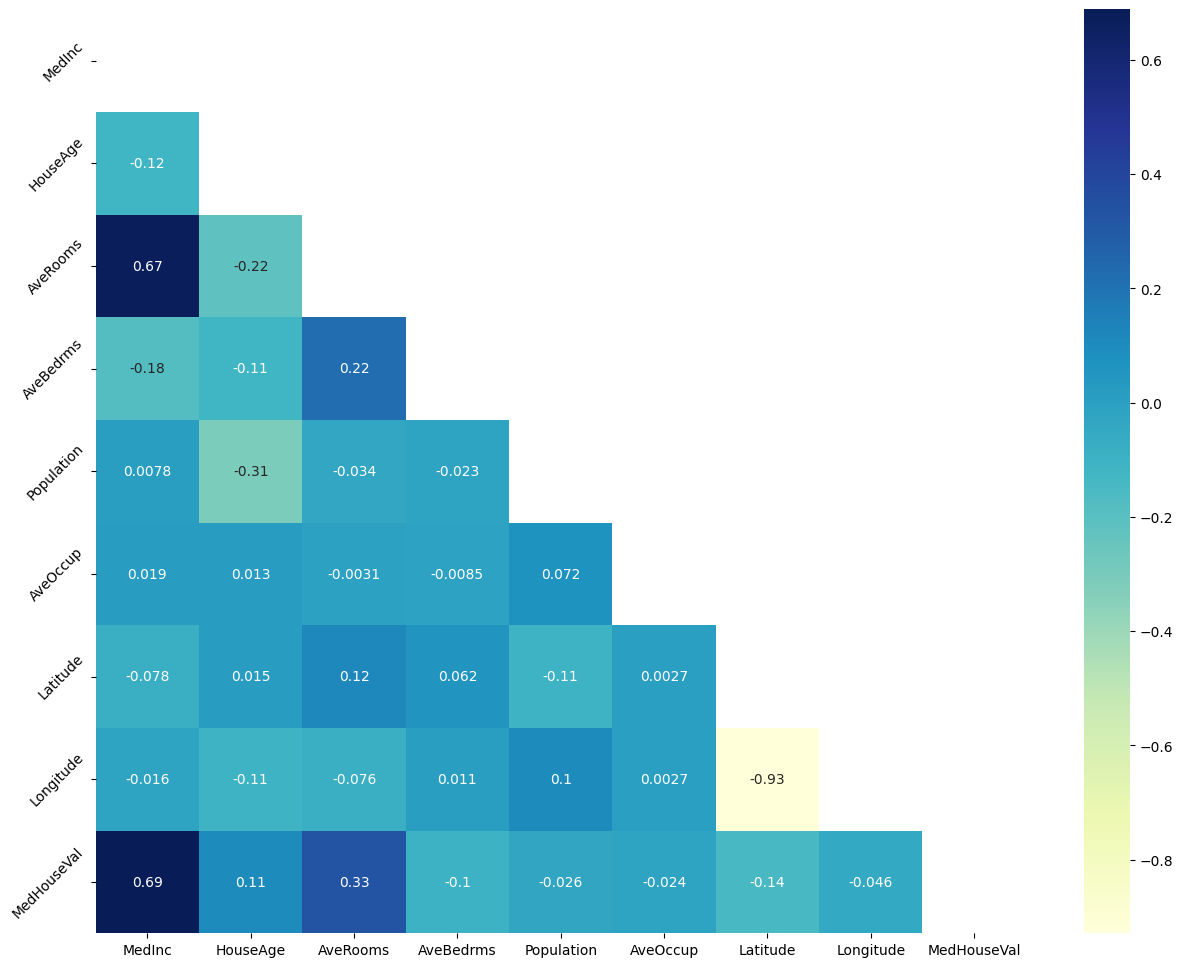

In [16]:
# Heatmap de la matrice de corrélation.

# Masque pour la partie supérieure de la matrice, qui est symétrique. 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Figure et plot
fig, ax = plt.subplots(figsize=(15,12)) 
dataplot = sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.yticks(rotation=45) 
plt.show()

*Réponse:*

- **MedInc vs AveRooms:** 

- **MedInc vs MedHouseVal:** 

- **AveRooms vs MedHouseVal:** 

- **Longitude vs Latitude:** 

- **AveRooms vs AveBedrooms:** 

- **Population vs HouseAge:** 


<a name="Part22pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.2: </b> Points obtenus: /11
</div>

Remarques de l'assistant: 


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

<a name="Part23"></a>
### 2.3 Régression linéaire simple 

[Début partie 2](#Part2) --- [Table des matières](#toc)


<div class="alert alert-block alert-warning">
<b>Attention: </b> la régression linéaire dans cet exercice peut prendre environ 5 minutes avec les hyper-paramètres actuels. 
</div>

Maintenant que vous êtes familiarisés avec la base de données, vous allez utiliser l'algorithme de régression linéaire simple vu en classe. 

Si vous voulez revoir comment fonctionne la régression linéaire il y a toujours [la vidéo de StatQuest](https://www.youtube.com/watch?v=nk2CQITm_eo) qui revoit étape par étape le fonctionnement de la régression simple et de l'ajustement d'une ligne aux données, de $ R^2 $ et de la régression multiple (en Anglais simple et clair mais quand même en 25 minutes, **les premières 10 minutes suffisent**). [Cette vidéo "The Main Ideas of Fitting a Line to Data"](https://www.youtube.com/watch?v=PaFPbb66DxQ) vous résume en moins de temps le concept qui va être utilisé dans le code ci-dessous: comment ajuster une ligne aux données. 

**Les troix méthodes ci-dessous: "*compute_MSE*", "*step_gradient*" et "*gradient_descent*" n'ont pas de commentaire d'entête.** 


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Complétez les docstrings en indiquant ce que fait la fonction et pourquoi, ce que l'on a comme paramètres et ce qu'elle retourne.</p>
(6 points)

In [17]:
def compute_MSE(b,m,data):
    """
    
    """
    totalError = 0
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 
    return totalError/ float(len(data))  

def step_gradient(b_current, m_current, data, learning_rate):
    """
    
    """
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs, verbose=False):
    """
    
    """
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b,m = step_gradient(b, m, np.array(data), learning_rate)
        if verbose:
            print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b,m]

---

Le code ci-dessous est simplement un joli packaging du code vu en cours. 


In [18]:


def score_simple_linear_regression(df: pd.DataFrame, var: str, lr: float, n_epochs: int, label: str = 'MedHouseVal', n_repetitions: int = 100) -> tuple:
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the California dataset.
    var : str
        Variable to use as feature.
    label : str, default 'MedHouseVal'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
        
    Returns
    -------
    Tuple
        (Mean score, list of labels, list of predictions, best m, best b)
    """
    scores = []
    labels = []
    predictions = []
    
    data = df[[var, label]].values
    
    ms = []
    bs = []
    
    for _ in range(n_repetitions):
        train, test = train_test_split(data, test_size=0.2)
        # Initialize m and b.
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        # Step 4: gradient descent
        [b, m] = gradient_descent(train, initial_b, initial_m, lr, n_epochs, verbose=False)
        preds = test[:, 0] * m + b
        lbls = [test[i, 1] for i in range(len(test))]
        ms.append(m)
        bs.append(b)
        
        # Inversez le commentaire ci-dessous pour utiliser la méthode de sklearn.
        #scores.append(r2_score(lbls, preds))
        scores.append(pearson(lbls, preds))
        
        labels += lbls
        predictions += list(preds)
    
    best_idx = scores.index(max(scores))
    
    return np.mean(scores), labels, predictions, ms[best_idx], bs[best_idx]

def plot_regression_line(data: np.ndarray, x_name: str, y_name: str, m: float, b: float, title: str) -> plt.axes:
    """
    Plot the regression line using the given `m` and `b`.
    
    Parameters
    ----------
    data : np.ndarray
        Data with the variable and the label to plot. 
        Label must be in the last column.
    x_name : str
        Name of the column for x.
    y_name : str
        Name of the column for y.
    m : float
        m value to use for the predictions.
    b : float
        b value to use for the predictions.
    title : str
        Title of the plot.
        
    Returns
    -------
    plt.axes
        Matplotlib ax. 
    """
    fig, ax = plt.subplots(figsize=(15, 9))
    data.plot.scatter(x=x_name, y=y_name, ax=ax, title=title)
    y_pred = m * data[x_name] + b
    ax.plot(data[x_name].values, y_pred, 'r')
    ax.text(0.025, 0.925,
            f'$R^2={np.round(r2_score(data[y_name].values, y_pred), 3)}$',
            fontsize=12, transform=ax.transAxes)
    return ax

**Normalisation des données et régression linéaire simple.**

Si vous n'avez pas réussi à écrire une fonction **pearson()**, (de)commentez les lignes indiquées dans la fonction "*score_simple_linear_regression()*" ci-dessus afin d'utiliser la méthode de sklearn. 


Comme vu dans le labo précédent, il vaut souvent mieux normaliser/standardiser les données (moyenne nulle et écart-type à 1). Ça n'est pas toujours le cas et ça peut être discutable. Ici nous allons normaliser les variables indépendantes que nous voulons utiliser pour la régression linéaire simple. 



*Tip: n'oubliez pas que vous pouvez développer ou réduire la sortie de l'exécution d'une cellule en cliquant sur la gauche de la cellule. Comme la sortie de la cellule suivante est relativement longue, la réduire pour ne pas scroller pendant trop longtemps peut être utile!*


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Lisez puis exécutez le code ci-dessous. Répondez en suite aux questions. Vous êtes libres de fixer un seed si vous le désirez afin d'avoir des résultats reproductibles.</p>

In [ ]:
import time

# seed 

# Mesure du temps au début
start = time.time()


# On va prendre un subset du dataframe, avec sa taille on en aurait pour 1h de calcul à chaque fois.
indices = rng.choice(np.arange(df.shape[0]), 
                     size=500,
                     replace=False)
subset_df = df.iloc[indices]

# Standardisation

# Copie de l'échantillon et normalisation des colonnes choisies (toutes sauf MedHouseVal)
df_normalized = subset_df.copy()
cols = subset_df.columns[df.columns != 'MedHouseVal']
scaler = StandardScaler()

df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

variables = ['MedInc',
             'AveRooms',
             'Population']


print(f"Variables testées pour la régression linéaire simple: {variables}") 
label = 'MedHouseVal'

learning_rates = [0.5, 0.1, 0.01, 0.001]
n_epochs = 30
scores = {}

for var in variables:
    print(f"Variable {var}")
    scores[var] = {}
    for lr in learning_rates:
        print(f"Learning rate: {lr}")
        score, _, _, m, b = score_simple_linear_regression(df_normalized, var, lr, n_epochs, label=label)
        scores[var][lr] = score
        plot_regression_line(df_normalized, var, 'MedHouseVal', m, b, f'Plot of regression line with {var=}, {lr=}')
        plt.show()

end = time.time()
print(f"Exécution: {end - start} secondes")

Variables testées pour la régression linéaire simple: ['MedInc', 'AveRooms', 'Population']
Variable MedInc
Learning rate: 0.5


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Résumez ce qui est fait dans cette partie 2.3. Quelles fonctions sont utilisées et pourquoi ? (pas besoin de donner les détails des fonctions que vous avez déjà complété plus haut)</p>(2 points)

*Réponse:*



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quel est le meilleur score que vous obtenez ? Et que signifie-t-il (qu'est-ce que $R^2$) ?</p>(2 points)

*Réponse:*



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quels sont les risques en choisissant un learning rate trop petit ou trop grand ?</p>(2 points)

*Réponse:*



<a name="Part23pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.3: </b> Points obtenus: /12
</div>

Remarques de l'assistant: 


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

<a name="Part24"></a>
### 2.4 Régression linéaire multiple

[Début partie 2](#Part2) --- [Table des matières](#toc)


Dans cette partie, nous allons utiliser [la classe LinearRegression de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) qui va nous permettre de tester plusieurs groupes de variables pour créer un modèle de régression linéaire avec plusieurs variables. 



---
Le modèle de régression linéaire multiple peut être exprimé comme suit :

$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_pX_p + \epsilon
$

où :
- $ Y $ est la variable dépendante,
- $ X_1, X_2, \ldots, X_p $ sont les variables indépendantes,
- $ \beta_0 $ est l'ordonnée à l'origine,
- $ \beta_1, \beta_2, \ldots, \beta_p $ sont les coefficients ou paramètres associés à chaque variable indépendante,
- $ \epsilon $ est le terme d'erreur.



En résumé, la régression linéaire multiple vise à modéliser la relation entre plusieurs variables indépendantes $ X_1, X_2, \ldots, X_p $ et une variable dépendante $ Y $ en ajustant une équation linéaire aux données observées. Les coefficients $ \beta_0, \beta_1, \ldots, \beta_p $ sont estimés en utilisant des techniques telles que les moindres carrés pour minimiser la différence entre les valeurs observées et prédites de la variable dépendante.

---

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Lisez puis exécutez le code ci-dessous. </p>

In [ ]:
import random
random.seed(4321)

# Régression linéaire avec sklearn

def score_linear_regression(df: pd.DataFrame, *var: str, label: str = 'MedHouseVal', n_repetitions: int = 100):
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the boston dataset.
    var : Tuple of str
        Tuple with the variables to use as feature.
    label : str, default 'MEDV'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
    """
    scores = []
    labels = []
    predictions = []
    
    for _ in range(n_repetitions):
        regressor = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(df[list(var)], df[label], test_size=0.2)
        regressor.fit(X_train, y_train)
        labels.append(y_test)
        predictions.append(regressor.predict(X_test))
        scores.append(regressor.score(X_test, y_test)) 
        
    return np.mean(scores), labels, predictions, regressor

On choisit en suite quel groupes de variables nous allons utiliser pour créer des modèles linéaires. On essaie plusieurs groupes avec une ou plusieurs variables. 

In [ ]:

groupes = [['Latitude', 'Longitude'], 
          ['AveRooms', 'Population', 'MedInc'],
          ['AveRooms', 'Population'], 
          ['AveRooms', 'MedInc'], 
          ['Population', 'MedInc'],
          ['MedInc']]

label = 'MedHouseVal'


Puis nous réalisons, à l'aide de notre fonction définie plus haut, plusieurs régression linéaires à l'aide des variables choisies. On afiche simplement le score obtenu: 

In [ ]:
results = []

for no, variables in enumerate(groupes):
    print("---------------------------------")
    print(f'Model number {no} using {variables}')
    score, y_true, y_pred, regressor = score_linear_regression(df_normalized, *variables, label=label)
    
    print(f'Score={score}')
    print(f'Coefficients: {regressor.coef_}')
    print(f'Intercept: {regressor.intercept_}')
    
    results.append(regressor)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quel est le meilleur score que vous obtenez ? Quel est le score (metrics) utilisé par LinearRegression() ?</p>(2 points)

*Réponse:*




<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Que sont les coefficients et l'intercept en terme de régression ? Comment sont-ils utilisés lors d'une prédiction ? </p> (2 points)

*Réponse:*



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Prenez le modèle (stocké dans la liste "results"), qui utilise le nombre moyen de pièces et le revenu median et faites les prédictions avec les valeurs suivantes. </p> (4 points)


- Block Group 1: AveRooms 10, MedInc 5
- Block Group 2: AveRooms 5, MedInc 10
- Block Group 3: AveRooms 2, MedInc 15
- Block Group 4: AveRooms 5, MedInc 5

Pour rappel du contexte, le but du modèle est de permettre de prédire le prix median des maisons dans un nouveau block group (petite région géographique). 



In [ ]:
# Votre code

# Préparez les données

data = np.array([])

column_names = []

new_data = pd.DataFrame(data, columns=column_names)


# Faites la prédiction et affichez le résultat (4 valeurs). 



<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Est-ce que les valeurs obtenues correspondent à ce qui était attendu (par rapport aux coefficients et à l'intercept) ? Que peut-on tirer de ces prédictions ? </p> (2 points)

*Réponse:*



<a name="Part24pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.4: </b> Points obtenus: /10
</div>

Remarques de l'assistant: 


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

<a name="Part25"></a>
### 2.5 Conclusion

[Début partie 2](#Part2) --- [Table des matières](#toc)


Nous avons maintenant un modèle qui prédit plus ou moins bien le prix d'une maison selon le nombre de pièces de la maison et surtout le revenu moyen des habitants du Block Group. Comme nous l'avons rapidement survolé, certaines variable (prédicteurs) peuvent être corrélées entre elles (voir [correlation heatmap](#plotC)) et cette [multicolinéarité](https://en.wikipedia.org/wiki/Multicollinearity) peut poser des problèmes. Répondez à la question suivante de manière concise. Vous êtes libre d'utiliser chatGPT ou autre IA pour vous aider.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quels risques la multicollinéarité des prédicteurs dans une régression linéaire peut-elle poser ?</p> (2 points)

*Réponse:*



<a name="Part25pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 2.5: </b> Points obtenus: /2
</div>

Remarques de l'assistant: 


[Début partie 2](#Part2) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

## 3) Tenter K-means<a name="Part3"></a>

[Table des matières](#toc)

Dans cette partie nous allons tenter de regrouper nos données en groupes distincts qui pourrait éventuellement nous permettre d'adapter notre algorithme de prédiction des prix. Comme nous l'avons vu lors de l'analyse exploratoire, les prix médians des maisons sont bien plus élevés près des grandes villes nous pourions alors éventuellement trouver des clusters distincts par région. 




<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Exercice </b></font> Exécutez le code ci-dessous et jouez avec le nombre de clusters. Observez le graphique 3D correspondant et répondez aux questions.</p> 

In [11]:
# Imports et analyse des interties

from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")


X1 = df[['Latitude' , 'Longitude', 'MedHouseVal']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()



ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Calcul des clusters
algorithm = (KMeans(n_clusters = 10 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_



In [ ]:
# Affichage du plot 3D
df['label3'] =  labels1
trace1 = go.Scatter3d(
    x= df['Latitude'],
    y= df['Longitude'],
    z= df['MedHouseVal'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 2,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
# Adjusting the axis ranges
x_range = [df['Latitude'].min(), df['Latitude'].max()]
y_range = [df['Longitude'].max(), df['Longitude'].min()]
z_range = [df['MedHouseVal'].min(), df['MedHouseVal'].max()]

layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Latitude', range=x_range),  # Adjusting x-axis range
        yaxis=dict(title='Longitude', range=y_range),  # Adjusting y-axis range
        zaxis=dict(title='MedHouseVal', range=z_range)  # Adjusting z-axis range
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Le clustering avec 2 clusters fait-il plus de sens que le clustering avec 6 clusters ? Quels clusters seraient intéressants ? Qu'observez-vous concernant les valeurs extrèmes ? Quelles variable pourrait être ajoutée au set de donnée ?</p> (5 points)

Donnez une analyse des clusters observés, des possibilités et des limitations du clustering dans notre cas. Faites des phrases et répondez un maximum aux questions.

*Réponse:*



<a name="Part3pts"></a>
<div class="alert alert-block alert-info">
<b>Corrections Partie 3: </b> Points obtenus: /5
</div>

Remarques de l'assistant: 


[Début partie 3](#Part3) --- [Table des matières](#toc)

<p style="background-color:#003c9c;padding:3px"><font size="4"><b></b></font></p>

Fin
